# SVM with Variations of Kernel and C values

In [1]:
# Import Important Libraries
from sklearn.linear_model import LogisticRegression # importing Sklearn's logistic regression's module
from sklearn import preprocessing # preprossing is what we do with the data before we run the learning algorithm
from sklearn.model_selection import train_test_split 
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import pandas as pd
from sklearn import svm

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the dataset
df= pd.read_csv(r"C:\Users\User\Downloads\data.csv",delimiter=',',na_values='?')
# If Overall for a play is less than 72, the player will be classify as bad player.
# Otherwise, the player will be classify as good player.
df.loc[df.Overall<72,'Y']=0
df.loc[df.Overall>=72,'Y']=1

In [3]:
# Set the data (X) and target (Y) values
Y=np.array(df['Y'])
X = df.drop(columns=['Overall','Y'])
y=np.array(X)
# Print the shape of data (X) and target (Y) values
print(X.shape)
print(Y.shape)

(8761, 42)
(8761,)


# Data Pre-Processing
Scale before splitting the data into train and test- scale the data since we will be using gradient ascent

In [4]:
# Use preprocessing to scale the data and use train_test_split to split the data.
x_scale = preprocessing.scale(X)
y = Y

x_train, x_test, y_train, y_test = train_test_split(x_scale, y)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


# Fitting Model using Sk Learn Library. 

In [5]:
accuracy_svm_train = []
accuracy_svm_test = []
variations = []
cVals = [0.01, 0.1, 1]
kernelTypes = ['linear','rbf','poly']
# Different kernels are used for variation
for kType in kernelTypes:
    # Different c values are used for variation
    for c in cVals:
        # svm.SVC is created with different variation of kerneal and c value
        svm_model = svm.SVC(probability = False, kernel = kType, C = c)
    
        # Fit the classifier on the training set
        svm_model.fit(x_train, y_train)
    
        # The prediction and accuracy of the training set
        Yhat_train = svm_model.predict(x_train)
        acc_train = np.mean(Yhat_train==y_train)
        accuracy_svm_train.append(acc_train)
    
        # The prediction and accuracy of the testing set
        Yhat_test = svm_model.predict(x_test)
        acc_test = np.mean(Yhat_test==y_test)
        accuracy_svm_test.append(acc_test)
    
        # Appending variation for graphing purposes
        variation = "C=" + str(c) + " & Kernel=" + kType
        variations.append(variation)
        print (variation)
        print (acc_train)
        print (acc_test)
    

C=0.01 & Kernel=linear
0.9351598173515981
0.9256047466910087
C=0.1 & Kernel=linear
0.9570776255707762
0.9511638521223186
C=1 & Kernel=linear
0.9732115677321157
0.9698767685988133


C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


C=0.01 & Kernel=rbf
0.8496194824961948
0.8521223185759927


C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


C=0.1 & Kernel=rbf
0.9337899543378996
0.9201277955271565


C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


C=1 & Kernel=rbf
0.9684931506849315
0.9488817891373802


C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


C=0.01 & Kernel=poly
0.6692541856925418
0.6481058877225011


C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


C=0.1 & Kernel=poly
0.8264840182648402
0.8119580100410771


C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


C=1 & Kernel=poly
0.9266362252663622
0.8991328160657234


# Plotting Accuracy v/s Variations.

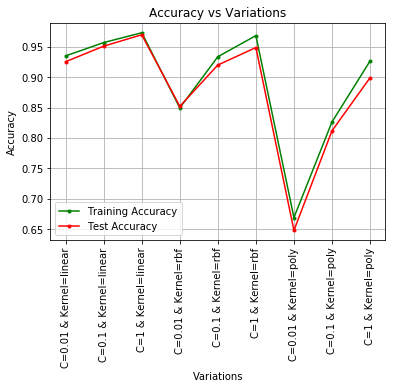

In [6]:
# Plot Accuracy v/s Variations.
plt.plot(variations,accuracy_svm_train,'.-',color='green')
plt.plot(variations,accuracy_svm_test,'.-',color='red')
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower left')
plt.xlabel('Variations')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.title("Accuracy vs Variations")
plt.grid()